Accuracy: 100.00%
Classification Report:
              precision    recall  f1-score   support

         ham       1.00      1.00      1.00      4045
        spam       1.00      1.00      1.00      3955

    accuracy                           1.00      8000
   macro avg       1.00      1.00      1.00      8000
weighted avg       1.00      1.00      1.00      8000



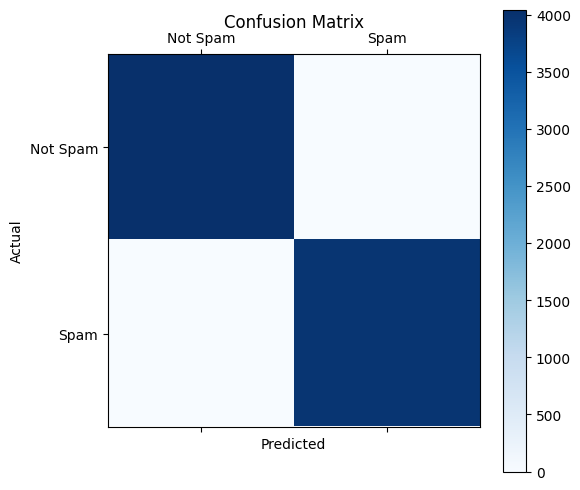

In [9]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import matplotlib.pyplot as plt

# Assuming you have already trained your model and have the predictions `y_pred` and true labels `y_test`

# Label mapping from integers to strings
label_map = {0: 'ham', 1: 'spam'}

# Convert y_pred (integers) to the corresponding labels (strings)
y_pred_labels = [label_map[label] for label in y_pred]

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred_labels)
print(f'Accuracy: {accuracy * 100:.2f}%')

# Display the classification report
print('Classification Report:')
print(classification_report(y_test, y_pred_labels))

# Display the confusion matrix
cm = confusion_matrix(y_test, y_pred_labels)

# Plot confusion matrix
fig, ax = plt.subplots(figsize=(6, 6))
cax = ax.matshow(cm, cmap='Blues')
fig.colorbar(cax)
plt.title('Confusion Matrix', pad=20)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.xticks([0, 1], ['Not Spam', 'Spam'])
plt.yticks([0, 1], ['Not Spam', 'Spam'])
plt.show()


In [13]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.naive_bayes import MultinomialNB
from sklearn.feature_extraction.text import TfidfVectorizer

# Define your dataset and preprocess it (example steps)
# Assuming 'X' is the raw text data and 'y' are the corresponding labels

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Convert text data into TF-IDF features
vectorizer = TfidfVectorizer(stop_words='english')
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)

# Initialize Naive Bayes classifier
nb_classifier = MultinomialNB()

# Train the classifier on the training data
nb_classifier.fit(X_train_tfidf, y_train)

# Cross-validation (for example, using 5 folds)
cross_val_scores = cross_val_score(nb_classifier, X_train_tfidf, y_train, cv=5)
print(f'Cross-validation scores: {cross_val_scores}')
print(f'Mean cross-validation score: {cross_val_scores.mean()}')

Cross-validation scores: [1. 1. 1. 1. 1.]
Mean cross-validation score: 1.0


In [14]:
from sklearn.metrics import confusion_matrix, classification_report

# Make predictions on the test set
y_pred = nb_classifier.predict(X_test_tfidf)

# Display confusion matrix
cm = confusion_matrix(y_test, y_pred)
print(f'Confusion Matrix:\n{cm}')

# Display classification report
print(f'Classification Report:\n{classification_report(y_test, y_pred)}')

Confusion Matrix:
[[4045    0]
 [   0 3955]]
Classification Report:
              precision    recall  f1-score   support

         ham       1.00      1.00      1.00      4045
        spam       1.00      1.00      1.00      3955

    accuracy                           1.00      8000
   macro avg       1.00      1.00      1.00      8000
weighted avg       1.00      1.00      1.00      8000

